<div align='center' ><font size='40'>计算机视觉homework1</font></div>

## 陈冠成21307110180


部分内容参考网上资源，详细代码在https://github.com/LaneChen77/Three-layer-classifer  中
运行环境为python3.11.8,linux Linux 10.192.9.251 5.15.0-94-generic #104-Ubuntu SMP Tue Jan 9 15:25:40 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux,Ubuntu 22.04.2 LTS


In [1]:
# Some common setups
import numpy as np
import gzip
import pickle
from solver import * # Solver for updating the model
from threelayernet import * # The three layer net model
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
%load_ext autoreload
%autoreload 2

因为我发现这个fashion-mnist数据集和mnist数据集的格式完全一样，所以类比mnist数据集来导入格式

这里是将下载的四个压缩包的数据处理成pkl格式的数据

In [2]:
filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]
mnist = {}
for name in filename[:2]:
    with gzip.open(name[1], 'rb') as f:
        mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
for name in filename[-2:]:
    with gzip.open(name[1], 'rb') as f:
        mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
with open("mnist.pkl", 'wb') as f:
    pickle.dump(mnist,f)
print("Save complete.")


Save complete.


读入mnist.pkl数据，因为训练集中有60000组数据，所以将最后600000组数据划分出来作为验证集

In [3]:
def load_mnist():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    sample_array = np.random.choice(60000, 60000, replace=False)
    mnist['training_images'] = mnist['training_images'][sample_array, :]
    mnist['training_labels'] = mnist['training_labels'][sample_array]
    data = {}
    data['X_train'] = mnist['training_images'][range(55000), :]
    data['y_train'] = mnist['training_labels'][range(55000)]
    data['X_val'] = mnist['training_images'][range(55000, 60000), :]
    data['y_val'] = mnist['training_labels'][range(55000, 60000)]
    data['X_test'] = mnist['test_images']
    data['y_test'] = mnist['test_labels']
    return data

data = load_mnist()
for k, v in list(data.items()):
    print(('%s: ' % k, v.shape))

('X_train: ', (55000, 784))
('y_train: ', (55000,))
('X_val: ', (5000, 784))
('y_val: ', (5000,))
('X_test: ', (10000, 784))
('y_test: ', (10000,))


在threelayernet.py文件中搭建了一个有一个输入层，一个隐藏层，一个输出层的三层神经网络。这个神经网络痛过叠加3个线性层和两个ReLU激活函数来实现，线性层和ReLU激活函数的实现在layers.py中，一个线性层和一个ReLU激活函数的复合在layers_utils.py 中，使用的损失函数为softmax cross entropy loss，对于每一层的函数，包括前向和反馈可以在 layers.py和layers_utils.py中找到，在solver.py中实现了训练过程，
因为这个是用jupyter notebook来写的，所以你可以一个一个cell的按顺序来运行得到结果。

In [4]:
input_size = 784
hidden_size1 = 25
hidden_size2 = 25
num_classes = 10
model = ThreeLayerNet(input_size, hidden_size1, hidden_size2,num_classes)
solver = Solver(model, data, print_every=100)
# For more parameters information of Solver, please check README
# or python file solver.py.
solver.train()

(Iteration 1 / 2750) loss: 2.302589
(Epoch 0 / 10) train acc: 0.100291; val_acc: 0.097400
(Iteration 101 / 2750) loss: 2.302552
(Iteration 201 / 2750) loss: 2.302557
(Epoch 1 / 10) train acc: 0.100327; val_acc: 0.096400
(Iteration 301 / 2750) loss: 2.302569
(Iteration 401 / 2750) loss: 2.302547
(Iteration 501 / 2750) loss: 2.302521
(Epoch 2 / 10) train acc: 0.100327; val_acc: 0.096400
(Iteration 601 / 2750) loss: 2.302397
(Iteration 701 / 2750) loss: 2.302280
(Iteration 801 / 2750) loss: 2.301998
(Epoch 3 / 10) train acc: 0.100327; val_acc: 0.096400
(Iteration 901 / 2750) loss: 2.301064
(Iteration 1001 / 2750) loss: 2.294479
(Epoch 4 / 10) train acc: 0.132073; val_acc: 0.128600
(Iteration 1101 / 2750) loss: 2.170468
(Iteration 1201 / 2750) loss: 2.077574
(Iteration 1301 / 2750) loss: 2.015304
(Epoch 5 / 10) train acc: 0.203709; val_acc: 0.197200
(Iteration 1401 / 2750) loss: 2.003975
(Iteration 1501 / 2750) loss: 1.983527
(Iteration 1601 / 2750) loss: 1.774182
(Epoch 6 / 10) train acc:

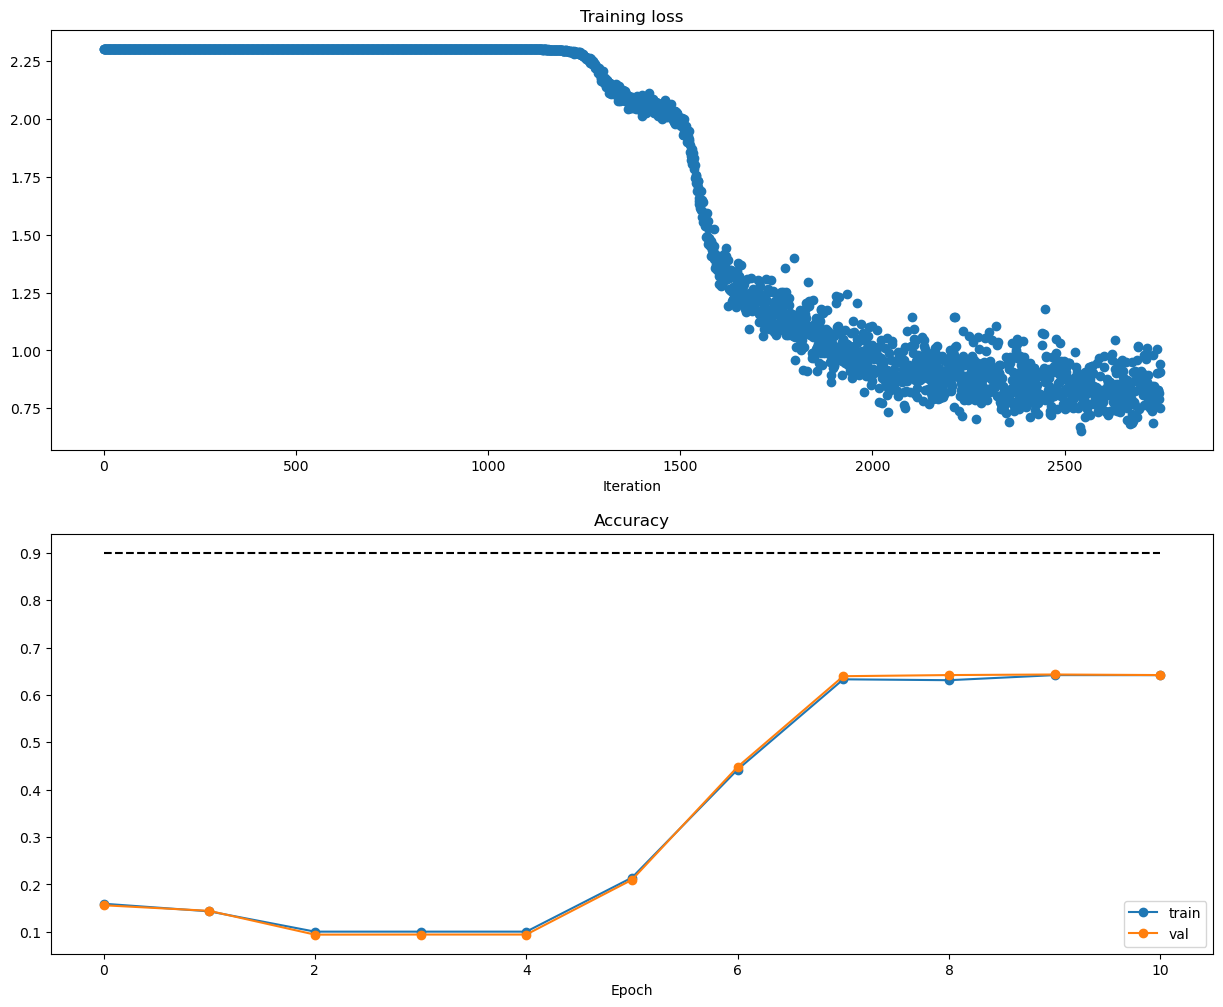

In [16]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.9] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

 这里我们加入正则化

In [5]:
input_size = 784
hidden_size = 25
num_classes = 10
# We apply a L2 regularization with strength 1e-3 here
model = ThreeLayerNet(input_size, hidden_size, hidden_dim2=50,num_classes =10, reg=1e-3)
solver = Solver(model, data, print_every=100)
solver.train()

(Iteration 1 / 2750) loss: 2.302605
(Epoch 0 / 10) train acc: 0.092200; val_acc: 0.094600
(Iteration 101 / 2750) loss: 2.302604
(Iteration 201 / 2750) loss: 2.302567
(Epoch 1 / 10) train acc: 0.100164; val_acc: 0.098200
(Iteration 301 / 2750) loss: 2.302567
(Iteration 401 / 2750) loss: 2.302505
(Iteration 501 / 2750) loss: 2.302360
(Epoch 2 / 10) train acc: 0.153418; val_acc: 0.147000
(Iteration 601 / 2750) loss: 2.302211
(Iteration 701 / 2750) loss: 2.301301
(Iteration 801 / 2750) loss: 2.297443
(Epoch 3 / 10) train acc: 0.100364; val_acc: 0.096400
(Iteration 901 / 2750) loss: 2.200503
(Iteration 1001 / 2750) loss: 2.081184
(Epoch 4 / 10) train acc: 0.200782; val_acc: 0.203200
(Iteration 1101 / 2750) loss: 2.047163
(Iteration 1201 / 2750) loss: 2.028592
(Iteration 1301 / 2750) loss: 1.765335
(Epoch 5 / 10) train acc: 0.411145; val_acc: 0.406200
(Iteration 1401 / 2750) loss: 1.238616
(Iteration 1501 / 2750) loss: 1.316764
(Iteration 1601 / 2750) loss: 1.229895
(Epoch 6 / 10) train acc:

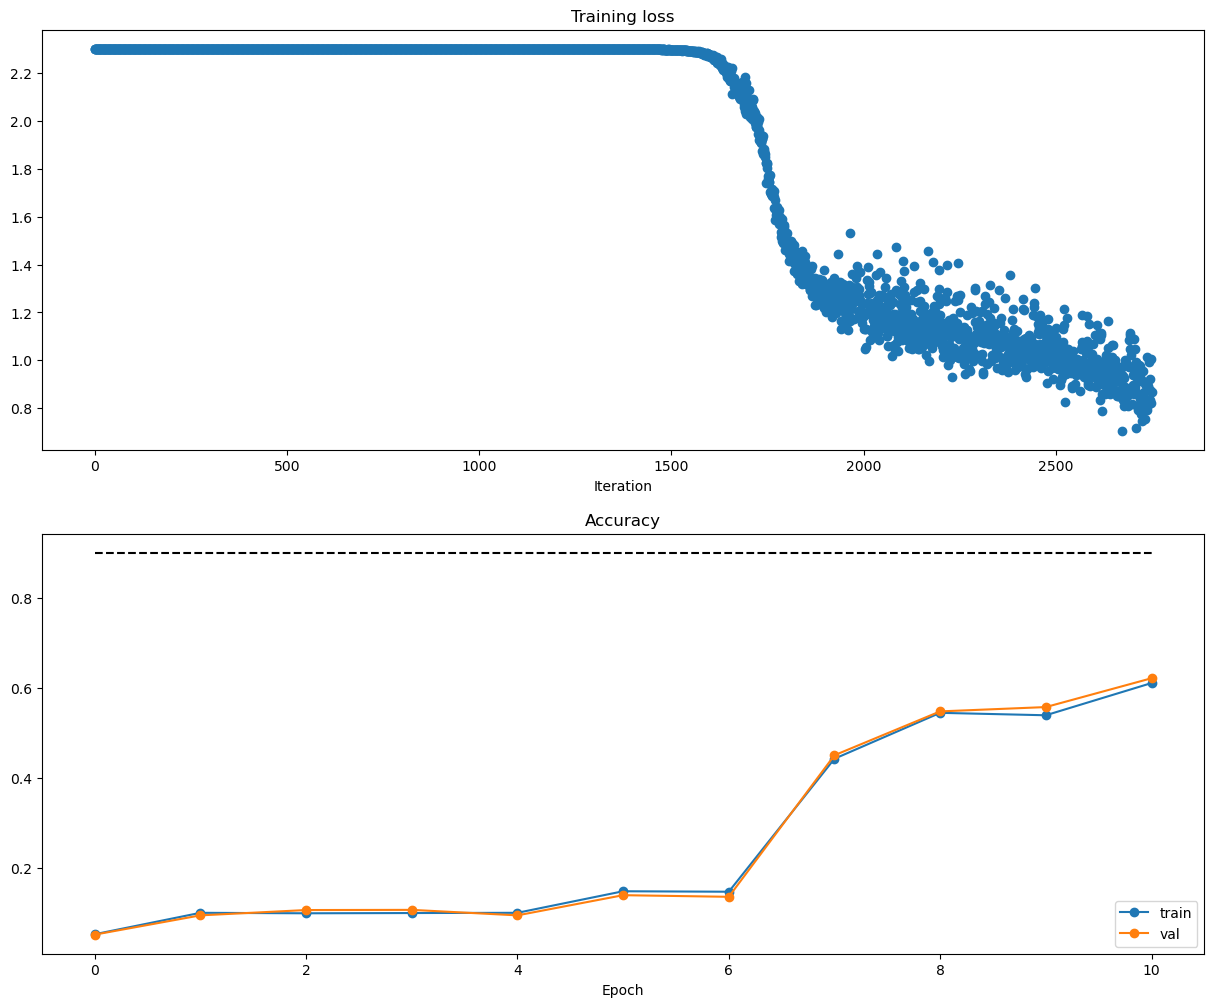

In [21]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.9] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

In [6]:
 y_test_pred = np.argmax(solver.model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())


Test set accuracy:  0.6508


In [7]:
input_size = 784
hidden_size = 25
num_classes = 10
model = ThreeLayerNet(input_size, hidden_size,hidden_size, num_classes)
# We apply learning rate decay here
solver = Solver(model, data, print_every=100, lr_decay=0.99)
solver.train()

(Iteration 1 / 2750) loss: 2.302583
(Epoch 0 / 10) train acc: 0.141345; val_acc: 0.149600
(Iteration 101 / 2750) loss: 2.302559
(Iteration 201 / 2750) loss: 2.302558
(Epoch 1 / 10) train acc: 0.105564; val_acc: 0.103400
(Iteration 301 / 2750) loss: 2.302554
(Iteration 401 / 2750) loss: 2.302519
(Iteration 501 / 2750) loss: 2.302602
(Epoch 2 / 10) train acc: 0.100164; val_acc: 0.098200
(Iteration 601 / 2750) loss: 2.302411
(Iteration 701 / 2750) loss: 2.302468
(Iteration 801 / 2750) loss: 2.302455
(Epoch 3 / 10) train acc: 0.104691; val_acc: 0.102600
(Iteration 901 / 2750) loss: 2.302396
(Iteration 1001 / 2750) loss: 2.302377
(Epoch 4 / 10) train acc: 0.214764; val_acc: 0.210800
(Iteration 1101 / 2750) loss: 2.302174
(Iteration 1201 / 2750) loss: 2.301636
(Iteration 1301 / 2750) loss: 2.299136
(Epoch 5 / 10) train acc: 0.188273; val_acc: 0.193200
(Iteration 1401 / 2750) loss: 2.278059
(Iteration 1501 / 2750) loss: 1.981957
(Iteration 1601 / 2750) loss: 1.554615
(Epoch 6 / 10) train acc:

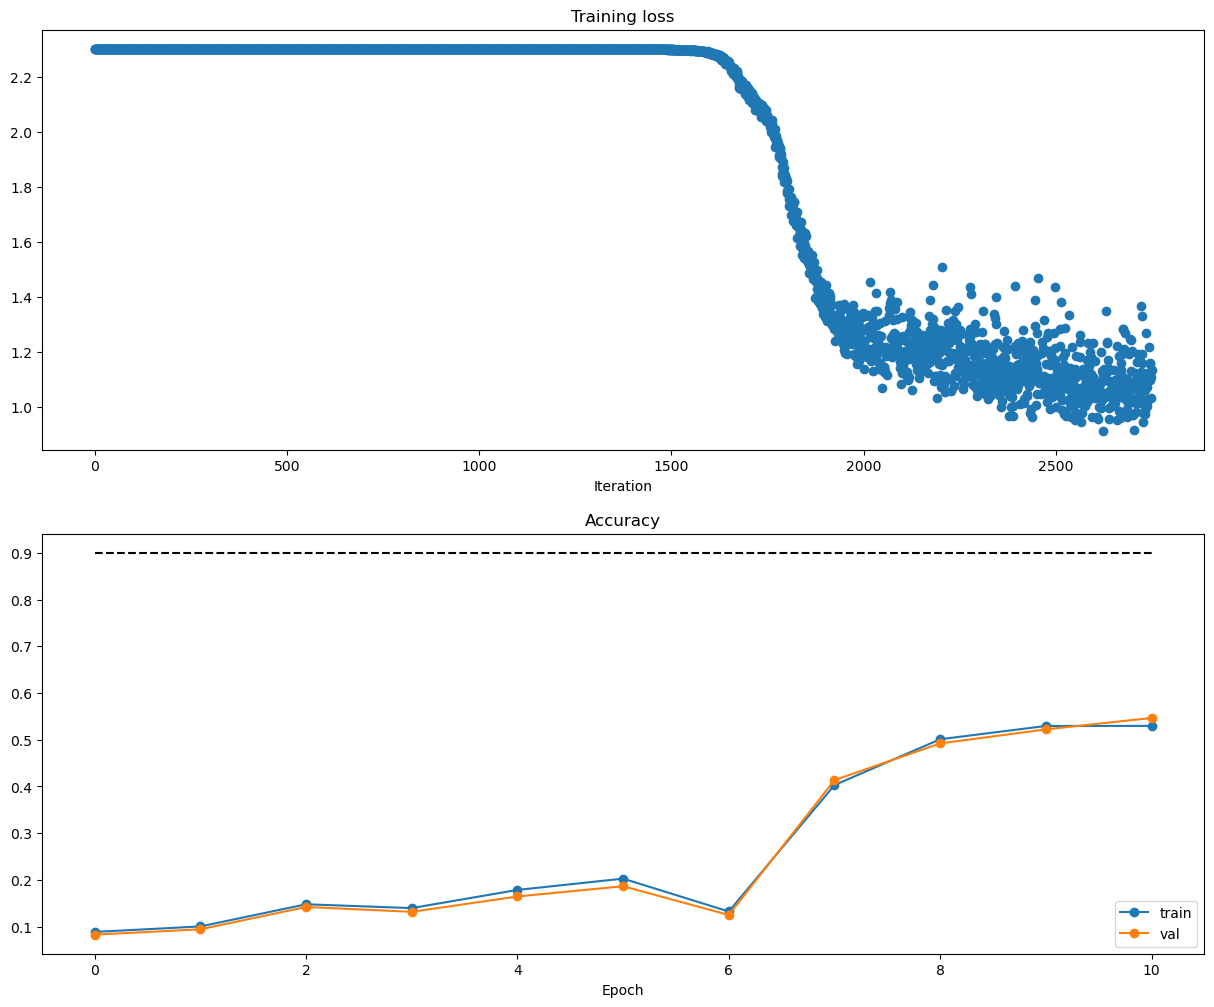

In [35]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.9] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

这里我们对不同的超参数进行了探索，通过探索发现，当学习率为0.0001时，结果较差，甚至在验证集上的结果还不到0.2，我觉得这可能是因为训练的时候训练的不够（训练采用的是训练多少次），学习率太小，还没收敛

In [6]:
input_size = 784
num_classes = 10

# Choice of hyperparameters
lr_rate = [1e-3, 1e-4] # Learning rate
hidden_units = [100, 200, 300] # Number of hidden units
regs = [1e-1, 1e-2, 1e-3] # Regularization strength
best_acc = 0.0
best_model = None
best_params = []

# Searching process
for lr in lr_rate:
    for units in hidden_units:
        for units1 in hidden_units:
            for reg in regs:
                model = ThreeLayerNet(input_size, 
                                    units, 
                                    num_classes, 
                                    reg=reg)
                solver = Solver(model, 
                                data, 
                                optim_config={
                                    'learning_rate': lr
                                },
                                verbose = False, # This is for 
                                                # printing the testing information
                                save_model = False, # This is for 
                                                    # saving the current model
                                num_epochs = 20) # This is for number of epochs
                solver.train()
                # Print each parameter's final result on the val set
                print("=================================================")
                print("learning rate = %f, hidden units = %d\,hidden units = %d\,nregularization strength = %f, accuracy on val = %f"
                    % (lr, units, units1,reg, solver.best_val_acc))
                if solver.best_val_acc > best_acc:
                    best_model = solver.model
                    best_acc = solver.best_val_acc
                    best_params = [lr, units, units1,reg]
                
# Testing the best model
best_model.reg = 0.0
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())
print("Best parameters:")
print("Learning rate:", best_params[0])
print("Hidden units:", best_params[1])
print("Regularization strength:", best_params[2])

learning rate = 0.001000, hidden units = 100\,hidden units = 100\,nregularization strength = 0.100000, accuracy on val = 0.791600
learning rate = 0.001000, hidden units = 100\,hidden units = 100\,nregularization strength = 0.010000, accuracy on val = 0.813400
learning rate = 0.001000, hidden units = 100\,hidden units = 100\,nregularization strength = 0.001000, accuracy on val = 0.824800
learning rate = 0.001000, hidden units = 100\,hidden units = 200\,nregularization strength = 0.100000, accuracy on val = 0.805000
learning rate = 0.001000, hidden units = 100\,hidden units = 200\,nregularization strength = 0.010000, accuracy on val = 0.816400
learning rate = 0.001000, hidden units = 100\,hidden units = 200\,nregularization strength = 0.001000, accuracy on val = 0.819800
learning rate = 0.001000, hidden units = 100\,hidden units = 300\,nregularization strength = 0.100000, accuracy on val = 0.796200
learning rate = 0.001000, hidden units = 100\,hidden units = 300\,nregularization strength

这里以第一层参数为例，可视化了第一层的参数

IndexError: index 300 is out of bounds for axis 0 with size 300

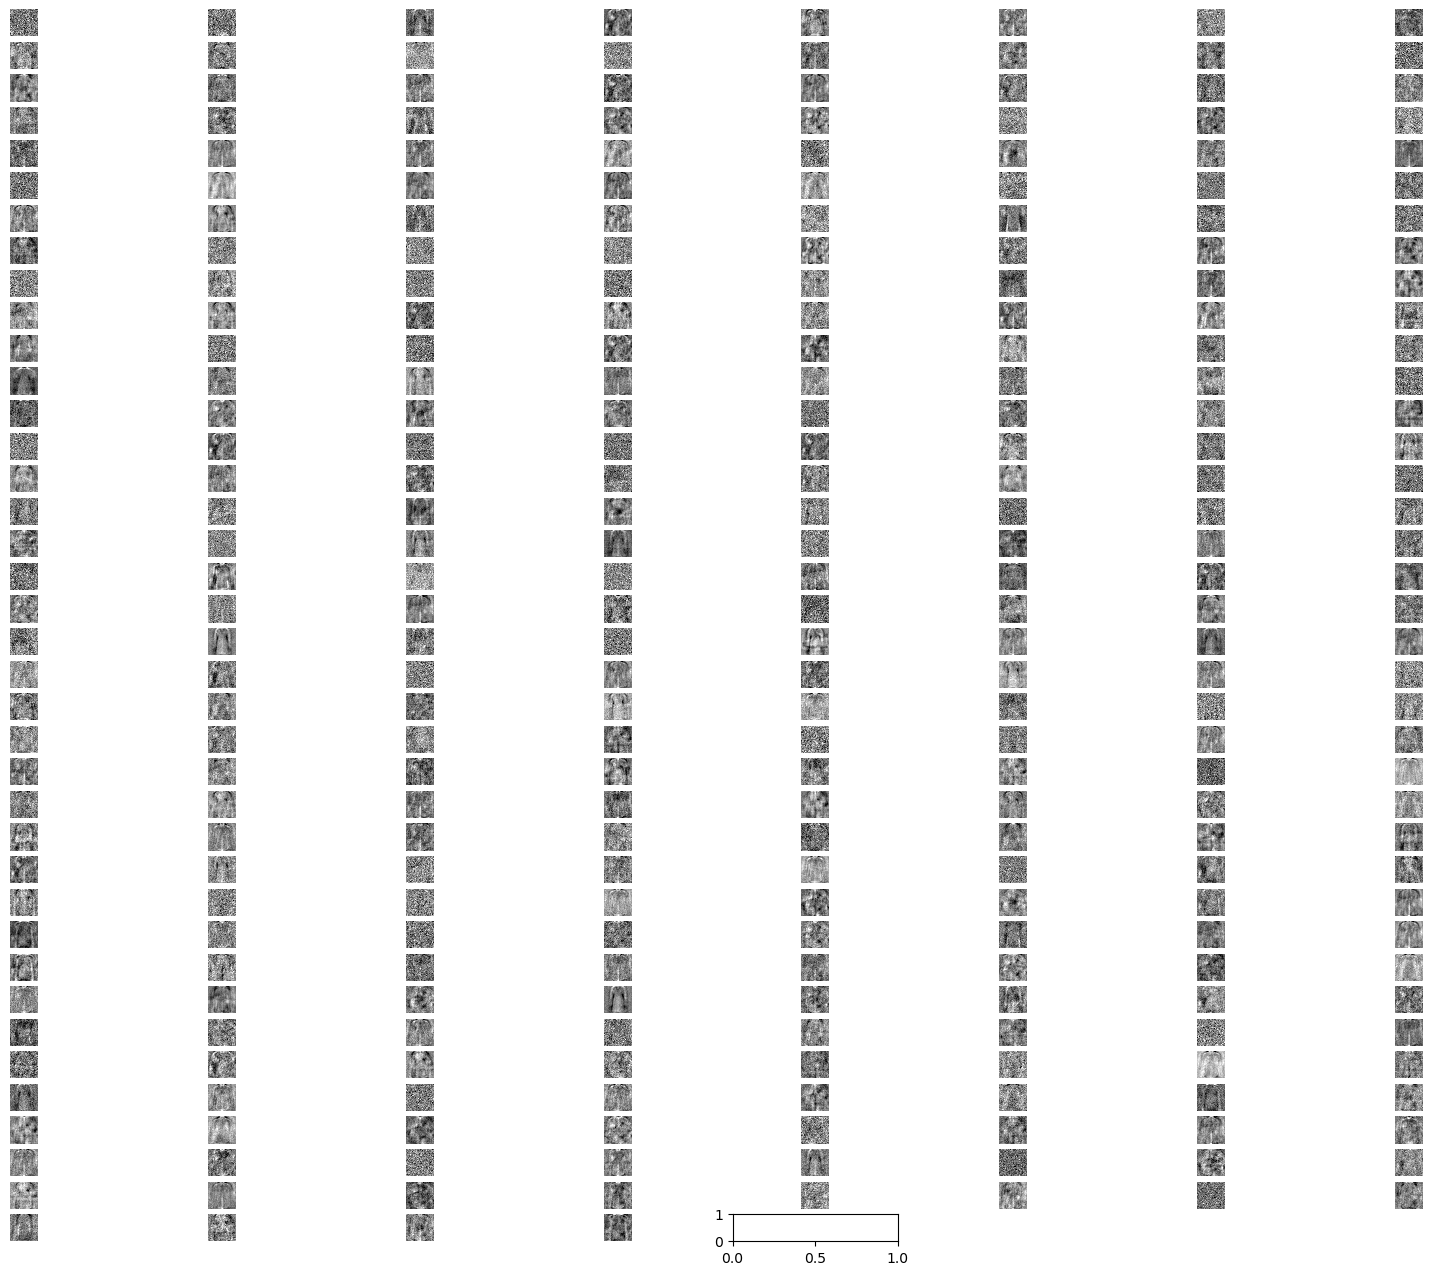

In [7]:
# Visualize the first weight
W1 = best_model.params['W1'].reshape(28, 28, -1).transpose(2, 0, 1)
plt.rcParams['image.cmap'] = 'gray'
num_row = (W1.shape[0] + 7) // 8
count = 0

for i in range(num_row):
    for j in range(8):
        plt.subplot(num_row, 8, count + 1)
        img = W1[count, :, :]
        img =  255.0 * (img - np.min(img)) / (np.max(img) - np.min(img))
        plt.imshow(img.astype('uint8'))
        plt.gca().axis('off')
        count = count + 1

plt.show()

In [9]:
np.save("best_model.npy", best_model.params)

In [15]:
params = np.load("best_model.npy", allow_pickle=True).item()
model = ThreeLayerNet(784, params['W1'].shape[1], 10, params=params)
y_test_pred = np.argmax(model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Test set accuracy:  0.8292
